In [1]:
import mailbox, pandas as pd, numpy as np
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from dateutil.parser import parse as parse_datetime
%matplotlib inline

In [2]:
family = 'Myraid Pro'
title_font = fm.FontProperties(family=family,style='normal',size=20,weight='normal',stretch='normal')
label_font = fm.FontProperties(family=family,style='normal',size=16,weight='normal',stretch='normal')
ticks_font = fm.FontProperties(family=family,style='normal',size=12,weight='normal',stretch='normal')


In [3]:
path = 'mail.mbox'
mbox = mailbox.mbox(path)
print('There are {:,} messages in the archive.'.format(len(mbox)))
mbox

There are 430 messages in the archive.


In [5]:
all_dates = []
all_times = []
for message in mbox:
    if not 'X-Gmail-Labels' in message or ('X-Gmail-Labels' in message and 
                                           not 'Chat' in message['X-Gmail-Labels']):
        if 'Date' in message and message['Date'] is not None:
            try:
                date,time=str(parse_datetime(message['Date'])).split(' ')
            except Exception as e:
                print(e,message['Date'])
            all_dates.append(date)
            all_times.append(time)
        else:
            pass
print('There are {:,} messages with dates'.format(len(all_dates)))

There are 401 messages with dates


In [12]:
for mes in mbox:
    print(mes['Date'])
    print(parse_datetime(mes['Date']))

Fri, 29 Nov 2019 03:44:42 +0530
2019-11-29 03:44:42+05:30
Fri, 06 Dec 2019 19:14:13 +0000 (UTC)
2019-12-06 19:14:13+00:00
Mon, 9 Dec 2019 03:29:41 +0530
2019-12-09 03:29:41+05:30
Tue, 10 Dec 2019 08:19:52 +0000
2019-12-10 08:19:52+00:00
Sun, 3 Nov 2019 14:28:12 +0530
2019-11-03 14:28:12+05:30
Thu, 14 Mar 2019 12:04:27 +0530
2019-03-14 12:04:27+05:30
Tue, 10 Dec 2019 14:45:55 +0530
2019-12-10 14:45:55+05:30
Tue, 5 Mar 2019 09:06:11 +0530
2019-03-05 09:06:11+05:30
Sun, 16 Jun 2019 11:10:10 +0530
2019-06-16 11:10:10+05:30
Wed, 3 Jul 2019 10:25:46 +0530
2019-07-03 10:25:46+05:30
Mon, 18 Nov 2019 15:20:26 +0000 (UTC)
2019-11-18 15:20:26+00:00
Fri, 3 May 2019 15:57:08 +0530
2019-05-03 15:57:08+05:30
Tue, 26 Nov 2019 03:41:55 +0000 (UTC)
2019-11-26 03:41:55+00:00
Wed, 04 Dec 2019 22:43:44 -0800
2019-12-04 22:43:44-08:00
Thu, 28 Nov 2019 08:11:41 +0530
2019-11-28 08:11:41+05:30
Thu, 12 Sep 2019 10:07:02 +0530
2019-09-12 10:07:02+05:30
Sat, 16 Nov 2019 09:32:14 +0000
2019-11-16 09:32:14+00:00
T

TypeError: Parser must be a string or character stream, not NoneType

## Plot the Gmail Traffic by Date

In [13]:
# get the count per date
date_counts = pd.Series(all_dates).value_counts().sort_index()
print('There are {:,} dates with messages'.format(len(date_counts)))
c = date_counts
c

There are 132 dates with messages


2017-11-03     1
2018-09-05     1
2018-12-12     1
2018-12-31     2
2019-01-01     1
2019-01-02     2
2019-01-03     1
2019-01-15     1
2019-01-19     1
2019-01-22     3
2019-01-23     1
2019-01-24     1
2019-01-25     1
2019-01-29     2
2019-02-02     1
2019-02-07     1
2019-02-08     1
2019-02-10     1
2019-02-13     1
2019-02-21     1
2019-02-22     1
2019-02-26     1
2019-03-04     1
2019-03-05     2
2019-03-11     3
2019-03-12     1
2019-03-14     4
2019-03-15     2
2019-03-16     1
2019-03-18     2
              ..
2019-11-13     3
2019-11-14     9
2019-11-15     7
2019-11-16     5
2019-11-17     4
2019-11-18     8
2019-11-19    10
2019-11-20     6
2019-11-21     4
2019-11-22    10
2019-11-23     4
2019-11-24     5
2019-11-25     8
2019-11-26     3
2019-11-27    12
2019-11-28    13
2019-11-29     8
2019-11-30     6
2019-12-01     4
2019-12-02     6
2019-12-03     5
2019-12-04    11
2019-12-05     5
2019-12-06    10
2019-12-07     4
2019-12-08     3
2019-12-09     7
2019-12-10    

In [29]:
# not every date necessarily has a message
# so fill the missing dates in the range with zeros
date_range = pd.date_range(start=min(all_dates),end=max(all_dates),freq='D')
index = date_range.map(lambda x:str(x.date()))
date_counts = date_counts.reindex(index,fill_value=0)
print('There are {:,} dates total in the range, with or without messages.'.format(len(date_counts)))
date_counts

There are 770 dates total in the range, with or without messages.


2017-11-03     1
2017-11-04     0
2017-11-05     0
2017-11-06     0
2017-11-07     0
2017-11-08     0
2017-11-09     0
2017-11-10     0
2017-11-11     0
2017-11-12     0
2017-11-13     0
2017-11-14     0
2017-11-15     0
2017-11-16     0
2017-11-17     0
2017-11-18     0
2017-11-19     0
2017-11-20     0
2017-11-21     0
2017-11-22     0
2017-11-23     0
2017-11-24     0
2017-11-25     0
2017-11-26     0
2017-11-27     0
2017-11-28     0
2017-11-29     0
2017-11-30     0
2017-12-01     0
2017-12-02     0
              ..
2019-11-13     3
2019-11-14     9
2019-11-15     7
2019-11-16     5
2019-11-17     4
2019-11-18     8
2019-11-19    10
2019-11-20     6
2019-11-21     4
2019-11-22    10
2019-11-23     4
2019-11-24     5
2019-11-25     8
2019-11-26     3
2019-11-27    12
2019-11-28    13
2019-11-29     8
2019-11-30     6
2019-12-01     4
2019-12-02     6
2019-12-03     5
2019-12-04    11
2019-12-05     5
2019-12-06    10
2019-12-07     4
2019-12-08     3
2019-12-09     7
2019-12-10    

In [32]:
# create a series of labels for the plot: each new year's data
xlabels = pd.Series([label if '01-01' in label else None for label in date_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]
xlabels

59     2018-01-01
424    2019-01-01
dtype: object

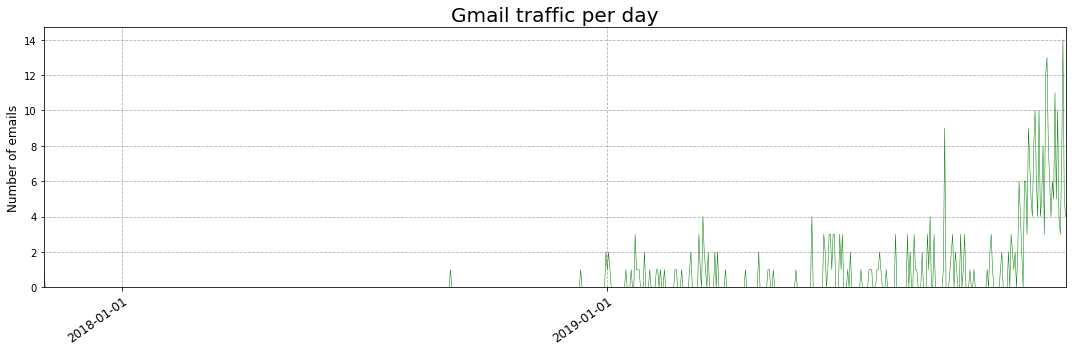

In [48]:
# plot the couunts per day
fig = plt.figure(figsize=[15,5])
ax = date_counts.plot(kind='line',linewidth=0.5,alpha=1,color='g')

ax.set_ylim(bottom=0)
ax.grid(True,linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels,rotation=35,rotation_mode='anchor',
                  ha='right',fontproperties=ticks_font) #  ha --> horizontal alignment
ax.set_ylabel('Number of emails',fontproperties=ticks_font)
ax.set_title('Gmail traffic per day', fontproperties=title_font)
fig.tight_layout()
fig.savefig('gmail-traffic-day.png',dpi=96)
plt.show()